# Import Module

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import sys
import os
import warnings
print(os.listdir('../dataset/preprocessing'))
print(os.listdir('../model'))
warnings.filterwarnings('ignore')
sys.path.append('../code')

from sklearn.metrics import accuracy_score, confusion_matrix
import shap
import xgboost as xgb

# Custom Module
from dataset.load import Load_Data
from preprocessing.preprocessing import DeriveFeature, Preprocess
from modeling.Validation import KFoldValidation
from modeling.HyperParameterTuning import RandomForestEvaluation, XGBEvaluation

['Preprocess_test.csv', 'Preprocess_train.csv']
['XGB_0.731', 'XGB_0.734', 'XGB_0.735']


# Load Model & Dataset

## Define Path

In [86]:
DATA_PATH = '../dataset'
MODEL_PATH = '../model'

## Data

In [87]:
train, test = Load_Data(DATA_PATH, minute = 10, return_test = True, split_size = 0.25)

X_train, X_test, y_train, y_test = Preprocess(train, test, scaling = False)
col_names = X_train.columns.tolist()

X_train, X_test, y_train, y_test = Preprocess(train, test, scaling = True)

Train Dataset Shape:  (19806, 50)
Test Dataset Shape:  (6603, 50)
Preprocessed Train Dataset Shape: (19693, 58)
Preprocessed Test Dataset Shape: (6571, 58)
Preprocessed Train Dataset Shape: (19693, 58)
Preprocessed Test Dataset Shape: (6571, 58)


## Model

In [88]:
pre_train_xgb = joblib.load(os.path.join(MODEL_PATH, 'XGB_0.735'))

# Prediction

In [89]:
ground_truth = y_train
prediction = pre_train_xgb.predict(X_test)

In [90]:
accuracy_score(y_test, prediction)

0.7345913863947648

In [91]:
confusion_matrix(y_test, prediction)

array([[2416,  871],
       [ 873, 2411]], dtype=int64)

# Feature Importance

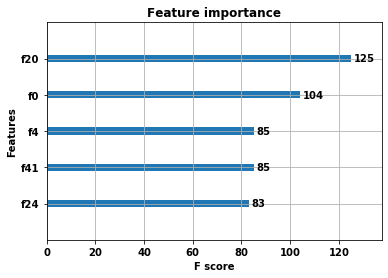

In [92]:
xgb.plot_importance(pre_train_xgb, importance_type = 'weight', max_num_features = 5)

plt.show()

# Visualization

In [93]:
class ExplainModel:
    def __init__(self, model, col_names):
        self.model = model
        self.col_names = col_names
        
    def FeatureImportance(self, importance_type):
        model = self.model
        model.get_booster().feature_names = self.col_names
        xgb.plot_importance(model,importance_type = importance_type, max_num_features = 5)
        
        plt.title("Feature Importance ({})".format(importance_type))
        plt.show()
        
    def SHAP_Value(self, test_data, unit, observation = 10, method = 'tree'):
        model = self.model
        
        if unit == 'solo':
            print("Blue Team Win Probability: ", model.predict_proba(test_data)[observation][1])
            
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(idx_test)
            
            shap.initjs()
        
            return shap.force_plot(explainer.expect_value[1], shap_values[1], idx_test)

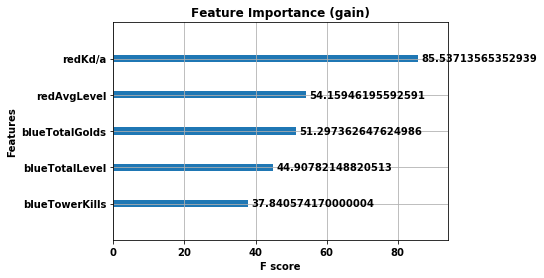

In [94]:
tmp = ExplainModel(model = pre_train_xgb, col_names = col_names)
tmp.FeatureImportance(importance_type = 'gain')

In [95]:
tmp.SHAP_Value(X_test, unit = 'solo')

ValueError: feature_names mismatch: ['blueTotalGolds', 'blueCurrentGolds', 'blueTotalLevel', 'blueAvgLevel', 'blueTotalMinionKills', 'blueTotalJungleMinionKills', 'blueFirstBlood', 'blueKill', 'blueDeath', 'blueAssist', 'blueWardPlaced', 'blueWardKills', 'blueFirstTower', 'blueFirstInhibitor', 'blueTowerKills', 'blueMidTowerKills', 'blueTopTowerKills', 'blueBotTowerKills', 'blueInhibitor', 'blueRiftHeralds', 'redTotalGolds', 'redCurrentGolds', 'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills', 'redTotalJungleMinionKills', 'redFirstBlood', 'redKill', 'redDeath', 'redAssist', 'redWardPlaced', 'redWardKills', 'redFirstTower', 'redFirstInhibitor', 'redTowerKills', 'redMidTowerKills', 'redTopTowerKills', 'redBotTowerKills', 'redInhibitor', 'redRiftHeralds', 'blueKd/a', 'redKd/a', "D_'AIR_DRAGON'_None_", "D_'EARTH_DRAGON'_None_", "D_'FIRE_DRAGON'_None_", "D_'WATER_DRAGON'_None_", "D__None_'AIR_DRAGON'", "D__None_'EARTH_DRAGON'", "D__None_'FIRE_DRAGON'", "D__None_'WATER_DRAGON'", 'D__None__None_', "T_'BOT_LANE'_None_", "T_'MID_LANE'_None_", "T_'TOP_LANE'_None_", "T__None_'BOT_LANE'", "T__None_'MID_LANE'", "T__None_'TOP_LANE'", 'T__None__None_'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57']
expected D__None_'WATER_DRAGON', redTotalJungleMinionKills, redBotTowerKills, D__None_'FIRE_DRAGON', T__None_'MID_LANE', blueTotalGolds, D_'EARTH_DRAGON'_None_, redWardKills, D__None_'AIR_DRAGON', redWardPlaced, redAvgLevel, redKill, blueAvgLevel, redMidTowerKills, D_'WATER_DRAGON'_None_, blueRiftHeralds, blueWardPlaced, T_'MID_LANE'_None_, T_'BOT_LANE'_None_, blueKd/a, blueTowerKills, blueDeath, blueTotalMinionKills, redRiftHeralds, D_'FIRE_DRAGON'_None_, blueWardKills, blueTopTowerKills, blueTotalJungleMinionKills, T__None_'BOT_LANE', redKd/a, blueFirstTower, blueCurrentGolds, D__None_'EARTH_DRAGON', redFirstBlood, redAssist, redTowerKills, blueKill, blueTotalLevel, blueFirstBlood, blueBotTowerKills, redTotalGolds, redCurrentGolds, redFirstTower, T_'TOP_LANE'_None_, blueAssist, redTopTowerKills, blueInhibitor, D_'AIR_DRAGON'_None_, redDeath, blueFirstInhibitor, redTotalMinionKills, blueMidTowerKills, redInhibitor, T__None__None_, redFirstInhibitor, redTotalLevel, D__None__None_, T__None_'TOP_LANE' in input data
training data did not have the following fields: f39, f14, f56, f35, f44, f50, f40, f47, f9, f22, f21, f46, f41, f31, f1, f55, f57, f25, f53, f34, f30, f0, f52, f19, f10, f29, f2, f27, f49, f3, f17, f51, f33, f48, f11, f16, f18, f37, f36, f43, f6, f26, f54, f24, f12, f5, f13, f23, f45, f8, f28, f15, f32, f38, f7, f42, f20, f4